### Benchmarking Performance of Trend Filtering on Real Data

Methods
- Trend Filtering (TF)
- Partitioned / Segmented Linear Regression (PLR)
- Linear Splines (LS)
- Kernel Smoothers (KS)

In [17]:
import sys
import os
sys.path.append('../../')
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from estimators.trend_filtering.trend_filter import Trend_Filter
from estimators.kernels.Kernel_Smoother import *
from estimators.splines.regression_spline_estimator import *
from estimators.regression.segmented_regression import *

from estimators.cv_base_estimator import cv_base_estimator

### Extract Data

In [12]:
sys.path.append("../")


PATH = "../../../../taq_db/TAQ-Query-Scripts/data/features/2020-01-02/"
sys.path.append(PATH)

os.listdir(PATH)[:20]

['CNC_reconstructed_features.csv',
 'ABBV_reconstructed_features.csv',
 'BWA_reconstructed_features.csv',
 'GOOG_reconstructed_features.csv',
 'AVGO_reconstructed_features.csv',
 'AME_reconstructed_features.csv',
 'CPT_reconstructed_features.csv',
 'BAX_reconstructed_features.csv',
 'BDX_reconstructed_features.csv',
 'AFL_reconstructed_features.csv',
 'CNP_reconstructed_features.csv',
 'CE_reconstructed_features.csv',
 'ANET_reconstructed_features.csv',
 'APD_reconstructed_features.csv',
 'ADBE_reconstructed_features.csv',
 'BAC_reconstructed_features.csv',
 'AES_reconstructed_features.csv',
 'CHTR_reconstructed_features.csv',
 'ADM_reconstructed_features.csv',
 'CDAY_reconstructed_features.csv']

### Train Each Method on first 250 observations

Again recall the methods are:
- Trend Filtering (TF)
- Linear Regression (LR)
- Linear Splines (LS)
- Kernel Smoothers (KS)


In [13]:
os.listdir(PATH)

DATA_FILE = "AMZN_reconstructed_features.csv"

market_data = pd.read_csv(PATH + DATA_FILE, index_col=0,nrows=12000)
market_data.index = pd.to_datetime(market_data.index)

trade_data= market_data[market_data["Trade_Volume"] > 0]

In [14]:
regular_trades = trade_data[trade_data["Sale_Condition"] == "@   "]
regular_trades.head()

print("Number of trades: ", len(regular_trades))

Number of trades:  591


### Trend Filtering

In [15]:
n= len(regular_trades)
m=int(0.8*n)

train = regular_trades.iloc[:m]
test = regular_trades.iloc[m:]

print("Number of training trades: ", len(train))
print("Number of test trades: ", len(test))


Number of training trades:  472
Number of test trades:  119


In [18]:
x=np.arange(0,len(train))

y=train["Trade_Price"].values

tf=Trend_Filter(x,y,k=1,method='primal_dual')

cv_base_estimator(tf)



Performing  0 out of 3 iterations of cross validation
Performing cross validation for lambda = 1.1281283725472517
Performing cross validation for lambda = 2.178074886765735
Performing cross validation for lambda = 4.205204237216246
Performing cross validation for lambda = 8.118978270283634
Performing cross validation for lambda = 15.675292907289064
Performing cross validation for lambda = 30.264252415682705
Performing cross validation for lambda = 58.431123405308064
Performing cross validation for lambda = 112.81283725472517
Performing cross validation for lambda = 217.8074886765735
Performing cross validation for lambda = 420.52042372162464
Performing cross validation for lambda = 811.8978270283624
Performing cross validation for lambda = 1567.5292907289065
Performing cross validation for lambda = 3026.425241568271
Performing cross validation for lambda = 5843.1123405308
Performing cross validation for lambda = 11281.283725472516
Performing  1 out of 3 iterations of cross validation
P

{'lambda_': 3.320242693626464}

In [20]:
test_x=np.arange(m,len(regular_trades))

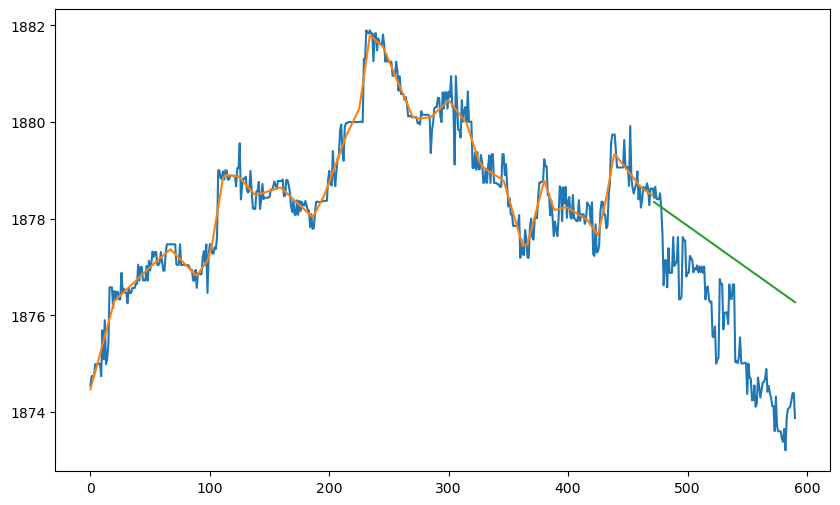

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(np.arange(n),regular_trades['Trade_Price'].values, label="Original")

ax.plot(x,tf.y_hat, label="Trend Filtered")

ax.plot(test_x,tf.estimate(test_x), label="Predicted")

### Partitioned (Segmented) Linear Regression

Here again the knot sets are chosen a priori to be the true knots



### Regression Splines

Note, here we assume the exact knots are known a priori allowing for the use of Regression Splines

### Kernels Regression with Fixed Bandwidth Parameteter